# Functions and Computation
In this assignment you write more complex functions, learn to use vector operations, and make more complex plots. You will learn basic functions, computations, and programming style that will be useful in later parts of the course.

Name: Hart Williams

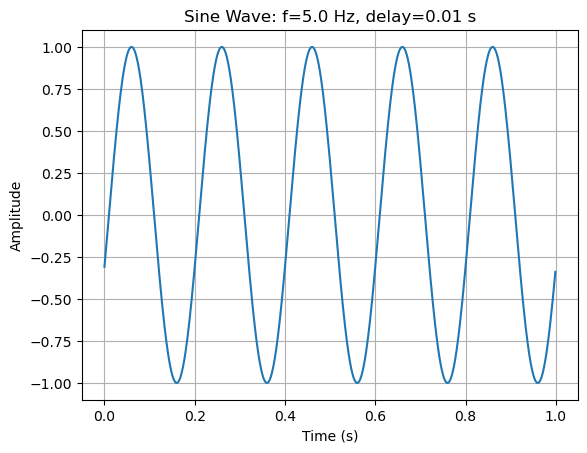

In [282]:
import numpy as np
import matplotlib.pyplot as plt

''' 1a) sinewave
sin(2πft + ϕ) is the sinuoid where f is the frequency in Hertz, t is the time in seconds, and ϕ is the phase in radians.
When working with sounds, it is often more convenient to think of a sine wave as having a time delay that is specified in seconds.
This sinewave function has arguments t for the time value, f for the frequency, and d for the delay in seconds, with default values for the
frequency and delay.
Note- A signal that normally starts at a time of 0 seconds with a delay d=0.01 would now start to +10 milliseconds.
t is an array of time values (in seconds)
'''
def sinewave(t, f=1.0, d=0.0):
    # Adjust the time values using the inputted delay
    adjusted_t = t - d
    
    # Return the sine wave values at the specified times
    return np.sin(2 * np.pi * f * adjusted_t)

# Parameters for sine wave
sampling_frequency = 1000     # in Hertz
duration = 1.0                # in seconds
frequency = 5.0               # in Hertz
delay = 0.01                  # in seconds

# Generate time array
t = np.linspace(0, duration, int(sampling_frequency * duration), endpoint=False)
# Integer typecast so that the number of samples is an integer. Also, endpoint=False excludes the stop value from the generated array.

# Generate sine wave
sine_wave = sinewave(t, f=frequency, d=delay)

# Plot the sine wave
plt.plot(t, sine_wave)
plt.title(f"Sine Wave: f={frequency} Hz, delay={delay} s")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

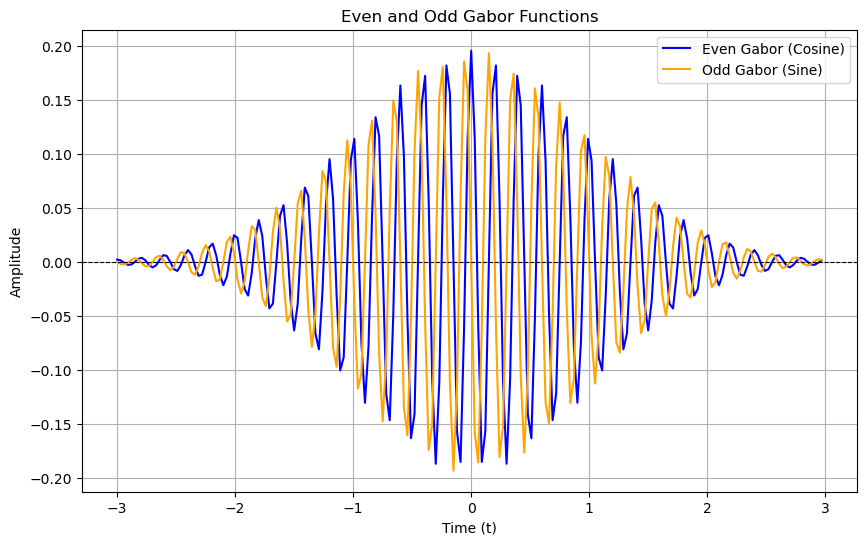

In [284]:
import numpy as np
import matplotlib.pyplot as plt

''' 1b) gabor
A Gabor function is a sinusoid modulated by a Gaussian. Mathematically, Gabor functions are usually centered at zero and are defined with
a cos or sin function to give even and odd versions of the functions, respectively. 
More generally, it can be defined as g(t) = a * exp(-t^2 / 2σ^2) * cos(2πft + ϕ).

-- There are several parameters, but they are usually values set to give characteristic properties. The amplitude is a normalizing constant
   which you should define so g(t) has unit norm ||g(t)|| = (∑g(t)^2)^(1/2) = 1

-- σ is the Gaussian width (or standard deviation) which is usually a small (integer) number of sinusoid periods.
-- The frequency f is in Hertz for temporal signals. For spatial signals, it is often convenient to define the sinusoid in terms of the period
   in pixels or samples, e.g. 1 period per 8 pixels.
-- The phase is in radians and is usually restricted to 0 or π/2 to give even and odd versions of the Gabor function (gabore and
   gaboro, which you should also define).
   
-- Scalar function definitions (for a scalar value of t) do not need to be normalized (since it depends on the sampling frequency),
   but they should accept the normalizing constant a.

-- Note that the scalar function could be computed (given the sampling frequency), but this would be very inefficient. Instead, define
   functions gabor_norm, gabore_norm, and gaboro_norm to compute the function norms, which you should use to compute the normalization
   constants. These functions should accept the same arguments as the scalar functions, but without a time argument and have an additional
   argument for the sampling frequency. The normalization constants should be computed using the non-zero extents of the functions. Vector
   functions should be normalized over the extent of the argument vector t.
'''


''' Vector Gabor function normalized over the extent of t.
g(t) = a * exp(-t^2 / 2σ^2) * cos(2πft + ϕ)
||g(t)|| = (∑g(t)^2)^(1/2) = 1
Parameters:
-- t is an array of sample time values
-- σ is Guassian width or standard deviation
-- f is the frequency in Hertz
-- phi is the phase in radians
Returns an array of the normalized Gabor function values for all time points in t.
However, this function is not yet normalized to have unit norm (length/magnitude of 1).
'''
def gabor_vector(t, σ, f, phi):
    g = np.exp(-t**2 / (2 * σ**2)) * np.cos(2 * np.pi * f * t + phi)
    norm = np.sqrt(np.sum(g**2))
    return g / norm


''' Compute the norm of the Gabor function.
What this function does:
-- It creates a range of t values (from -3*σ to 3*σ) to capture the main extent of the Gabor function
-- It computes the Gabor values over this range using the equation
-- It computes the norm (square root of the sum of squared values, scaled by the sampling frequency)
Parameters:
-- σ is Gaussian width, f is frequency in Hz, phi is phase in radians
-- No argument for time values
-- Instead have sampling frequency fs
'''
def gabor_norm(σ, f, phi, fs):
    t = np.arange(-3 * σ, 3 * σ, 1 / fs)
    g = np.exp(-t**2 / (2 * σ**2)) * np.cos(2 * np.pi * f * t + phi)
    return np.sqrt(np.sum(g**2) / fs)


# Computes the normalizing constant for an even version of the Gabor function (with phi=0)
def gabore_norm(σ, f, fs):
    return gabor_norm(σ, f, 0, fs)
    
# Computes the normalizing constant for an odd version of the Gabor function (with phi=π/2)
def gaboro_norm(σ, f, fs):
    return gabor_norm(σ, f, np.pi / 2, fs)



# For even function: Calculate norm a, then use the scalar Gabor function to compute values
def gabore(t, σ, f, a=None):
    is_scalar = np.isscalar(t)   # Check if t was originally a scalar
    t = np.atleast_1d(t)         # Ensures t is at least a 1D array

    if a is None:   # Compute 'a' if it's not explicitly set to something else
        a = 1 / gabore_norm(σ, f, len(t))
    
    result = gabor_vector(t, σ, f, 0) * a
    return result.item() if is_scalar else result   # Convert back to scalar if needed


# For odd function: Calculate norm a, then use the scalar Gabor function to compute values
def gaboro(t, σ, f, a=None):
    is_scalar = np.isscalar(t)   # Check if t was originally a scalar
    t = np.atleast_1d(t)         # Ensures t is at least a 1D array

    if a is None:   # Compute 'a' if it's not explicitly set to something else
        a = 1 / gaboro_norm(σ, f, len(t))
        
    result = gabor_vector(t, σ, f, np.pi / 2) * a
    return result.item() if is_scalar else result   # Convert back to scalar if needed


''' Now to plot the Gabor function '''
# Parameters for the Gabor function:
sigma = 1                  # Gaussian width
frequency = 5              # Frequency in Hz
sampling_frequency = 100   # Sampling frequency in Hz
duration = 2               # Duration in seconds

# Generate time vector
t = np.linspace(-3 * σ, 3 * σ, int(sampling_frequency * duration), endpoint=False)

# Compute even and odd Gabor functions
even_gabor = gabore(t, σ=sigma, f=frequency)
odd_gabor = gaboro(t, σ=sigma, f=frequency)

# Plot the functions
plt.figure(figsize=(10, 6))
plt.plot(t, even_gabor, label='Even Gabor (Cosine)', color='blue')
plt.plot(t, odd_gabor, label='Odd Gabor (Sine)', color='orange')

# Add titles and labels
plt.title('Even and Odd Gabor Functions')
plt.xlabel('Time (t)')
plt.ylabel('Amplitude')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid()

# Show the plot
plt.show()

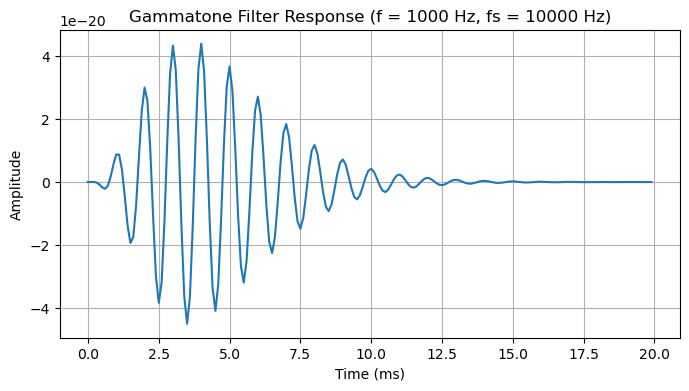

In [289]:
import numpy as np
import matplotlib.pyplot as plt
# quad numerically integrates a function from 0 to ∞
from scipy.integrate import quad   

''' 1c) gammatone
The gammatone function is defined as g(t) = a * t^(n-1) * e^(-2πbt) * cos(2πft+ϕ), t≥0
where f is the frequency in Hertz and ϕ is the phase in radians. For your function, use the name gammatone. Note that g(t) = 0 for t < 0.  
The exponent n is the shape parameter (n=4 is a typical value). The inverse scale parameter b is defined as b=1.019 * ERB(f) where
ERB(f)=24.7(4.37f/1000+1). The amplitude a should be computed from the function gammatone_norm so that the function has unit norm.
ERB stands for equivalent rectangular bandwidth.
'''
# Compute ERB
def erb(f):
    return 24.7 * (4.37 * f / 1000 + 1)

n = 4     # shape parameter, global variable for default value n=4

''' Compute the amplitude normalization factor a to ensure unit norm
What this function does:
-- It computes b, the inverse scale parameter
-- It creates a time vector based on the sampling frequency
-- The original function integrates ∫0∞ [t^2(n-1) * e^−4πbt]dt. Here, we approximate the integration with ∑[t^2(n−1) * e^−4πbt],
   summing over discrete time points.
-- It computes a by taking the square root of the reciprocal of the discrete sum approximation
'''
def gammatone_norm(f, fs, n=None):
    if n is None:  # Use the global n if not provided
        n = globals().get("n", 4)   # Fallback to 4 if n isn't defined globally

    b = 1.019 * erb(f)

    # Generate a time vector with the given sampling frequency
    duration = 1.0                                                     # Use 1 second as the standard duration
    t = np.linspace(0, duration, int(fs * duration), endpoint=False)   # Create discrete time samples

    # Compute the discrete sum approximation
    norm_value = np.sum(t**(2*(n-1)) * np.exp(-4*np.pi*b*t)) / fs  # Normalize by fs to approximate integration
    return np.sqrt(1 / norm_value)  # Square root normalization


phi = 0   # phase in Radians


# Compute the gammatone function value at time t
def gammatone(t, f, a=None, fs=10000):
    if t < 0:
        return 0
    b = 1.019 * erb(f)
    
    if a is None:   # Compute 'a' if it's not explicitly set to something else
        a = 1 / gammatone_norm(f=f, fs=fs)
        
    return a * t**(n-1) * np.exp(-2*np.pi*b*t) * np.cos(2*np.pi*f*t + phi)


''' Now to plot the gammatone function '''
# Parameters:
frequency = 1000        # frequency in Hz
sampling_freq = 10000   # sampling frequency in Hz
duration = 0.02         # 20 ms

# Generate time vector
t_values = np.linspace(0, duration, int(duration * sampling_freq), endpoint=False)  # Time from 0 to 20ms

# Compute a using sampling_frequency
a = 1 / gammatone_norm(f=frequency, fs=sampling_frequency) 

# Then compute gammetone values with normalization
g_values = np.array([gammatone(t, f=frequency, a=a) for t in t_values])

# Create plot
plt.figure(figsize=(8, 4))
plt.plot(t_values * 1000, g_values)  # Convert time to milliseconds
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")
plt.title(f"Gammatone Filter Response (f = {frequency} Hz, fs = {sampling_freq} Hz)")
plt.grid()
plt.show()

In [291]:
''' 2a) localmaxima
 Write a function to compute the indices of the local maxima of a 1D signal (i.e. an array) ignoring edges and plateaus (i.e. ranges where
 the function has constant value). The function should return the indices of all maxima, which we will define simply as
 f[i-1] < f[i] > f[i+1]. Note we have used square brackets to emphasize that f[i] is an array with discrete index i vs
 f(t) which is a continuous function of t.
'''
def localmaxima(f):
    # Check if f is a list
    if not isinstance(f, list):
        return
    
    maxima = []
    for i in range(len(f)):
        # Skip first and last positions in array
        if i == 0 or i == len(f) - 1:
            continue
        
        # If f[i] is a local maxima, append i to maxima array
        if (f[i-1] < f[i]) and (f[i] > f[i+1]):
            maxima.append(i)
    
    return maxima

test1 = []
test2 = [0, 1]
test3 = [1, 2, 1]
test4 = [1, 3, 7, 5, 2, 6, 9, 14, 13, 14, 5, 1]

print(localmaxima(test1))
print(localmaxima(test2))
print(localmaxima(test3))
print(localmaxima(test4))

[]
[]
[1]
[2, 7, 9]


In [311]:
''' 2b) crossings
Write a function to compute the indices of the locations where a function (again an array) first equals or crosses a specified threshold.
The function should also take an argument that specifies three possibilities of the direction of the crossing:
1) negpos: from below the threshold to equal to or greater than the threshold;
2) posneg: from equal to or greater than threshold to below the threshold;
3) both: for crossing in either direction. 
It should return the indices of the threshold crossings.
'''
# Assuming valid inputs
def crossings(f, threshold, dir):
    crossings = []
    
    if (dir == "negpos"):
        for i in range(len(f)):
            if i == 0:
                continue
            if (f[i-1] < threshold) and (threshold <= f[i]):
                crossings.append(i)

    elif (dir == "posneg"):
        for i in range(len(f)):
            if i == 0:
                continue
            if (f[i-1] >= threshold) and (threshold > f[i]):
                crossings.append(i)
                
    elif (dir == "both"):
        for i in range(len(f)):
            if i == 0:
                continue
            if (f[i-1] < threshold) and (threshold <= f[i]):
                crossings.append(i)
            elif (f[i-1] >= threshold) and (threshold > f[i]):
                crossings.append(i)

    return crossings

testArray = [0, 1, 2, 3, 2, 4, 1, 1, 0, -2, -4, -2, 0]
print(crossings(testArray, threshold=2, dir="negpos"))
print(crossings(testArray, threshold=2, dir="posneg"))
print(crossings(testArray, threshold=2, dir="both"))
print(crossings(testArray, threshold=0, dir="both"))

[2]
[6]
[2, 6]
[9, 12]


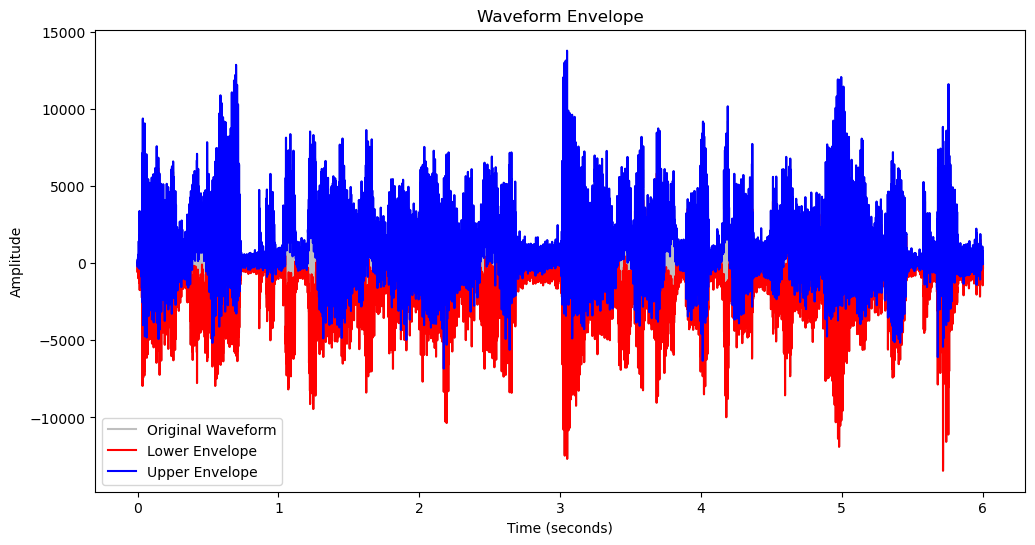

In [323]:
''' 2c) envelope
Here, we will just compute a simple envelope. Write a function 
ylower, yupper, blockindices = envelope(y; nblocks)
which, given a waveform or vector y, returns the lower and upper bounds for nblocks blocks in y. blockindices returns the starting indices
of each block. A reasonable default for nblocks is 1/10th the length of y.
''' 
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Load the audio file
samplerate, data = wavfile.read('speech.wav')


# Compute the lower and upper bounds for nblocks # of blocks in numpy array y, which represents the input waveform
def envelope(y, nblocks=None):
    y = np.asarray(y)  # Ensure y is a NumPy array
    
    if nblocks is None:
        nblocks = max(1, len(y) // 10)  # Default to 1/10th of the length of y
        
    block_size = max(1, len(y) // nblocks)  # Ensure block_size is at least 1
    blockindices = np.arange(0, len(y), block_size)

    # Calculate the minimum and maximum values in each block
    ylower = np.array([np.min(y[i:i+block_size]) for i in blockindices])
    yupper = np.array([np.max(y[i:i+block_size]) for i in blockindices])
        
    return ylower, yupper, blockindices


# Store the values returned by the envelope function
ylower, yupper, blockindices = envelope(data)


''' Now plot the envelope '''
plt.figure(figsize=(12, 6))

# Time axis in seconds
time = np.linspace(0, len(data) / samplerate, num=len(data))
block_time = time[blockindices]  # Time corresponding to block indices

plt.plot(time, data, alpha=0.5, label="Original Waveform", color='gray')
plt.plot(block_time, ylower, label="Lower Envelope", color='red')
plt.plot(block_time, yupper, label="Upper Envelope", color='blue')

plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Waveform Envelope")
plt.legend()
plt.show()